In [1]:
seed=196

In [2]:
import warnings
# warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ['PYTHONHASHSEED']=str(seed)

In [1]:
import tensorflow as tf


tf.random.set_seed(seed)

from keras.models import Sequential, load_model, save_model
from keras.layers import Dense,Input,Reshape, Lambda,Add, Flatten,ELU,RepeatVector,TimeDistributed, Bidirectional, PReLU, Concatenate, Subtract
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, Embedding, multiply
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D, MaxPooling1D, UpSampling1D
from tensorflow.keras import Input, Model
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tqdm import tqdm
from keras.optimizers import Nadam
from keras.models import clone_model
from keras import backend as K
import glob
import keras
from datetime import datetime
from keras.callbacks import EarlyStopping
import time
# from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
# from sklearn.metrics import r2_score
from keras.utils import plot_model
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
np.random.seed(seed)
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
from keras.utils import to_categorical
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.stattools import pacf
%matplotlib inline
from matplotlib.pylab import rcParams
# import seaborn as sns
rcParams['figure.figsize']=15,5

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


2023-07-02 22:32:35.140448: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


NameError: name 'seed' is not defined

In [4]:
from time import time


import pandas as pd
import random

# For plotting
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,7)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [5]:
def convert_to_one_hot(arr):
    """
    Convert a given array into one-hot encoding.
    
    Args:
        arr (numpy.ndarray): Input array to be converted.
    
    Returns:
        numpy.ndarray: One-hot encoded array.
    """
    # Get the unique elements in the input array
    unique_elements = np.unique(arr)
    
    # Create a dictionary to map unique elements to one-hot vectors
    one_hot_dict = {elem: np.eye(len(unique_elements))[i] for i, elem in enumerate(unique_elements)}
    
    # Map the input array to one-hot vectors
    one_hot_arr = np.array([one_hot_dict[elem] for elem in arr])
    
    return one_hot_arr

In [6]:
def reset_random_seeds(seed):
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [7]:
Stations = os.listdir('Clean-dataset-LMS')
# Stations.remove('.DS_Store')

In [8]:
Stations

['clean_deep_LMS Data - Rulehr_Shahpur_Kangra.csv',
 'clean_deep_LMS Data - griffon peak 4.csv',
 'clean_deep_LMS Data - Ghoro_Farm_2.csv',
 'clean_deep_LMS Data - Ghoda Farm 3.csv',
 'clean_deep_LMS Data - dharamshala kangra.csv',
 'clean_deep_LMS Data - Purbani_Kinnaur.csv',
 'clean_deep_LMS Data - Ghoda Farm 5.csv',
 'clean_deep_LMS Data - Garudnala_Mandi.csv',
 'clean_deep_LMS Data - macleodganj kangra.csv',
 'clean_deep_LMS Data - Sanarli_1_Mandi.csv',
 'clean_deep_LMS Data - Pagal_Nala_Kinnaur.csv',
 'clean_deep_LMS Data - Nigulsari_Kinnaur.csv',
 'clean_deep_LMS Data - Sanarli_3_Mandi.csv',
 'clean_deep_LMS Data - Urni_Dhank_Kinnaur.csv',
 'clean_deep_LMS Data - Kuppa_Kinnaur.csv',
 'clean_deep_LMS Data - Batseri_Kinnaur.csv',
 'clean_deep_LMS Data - griffon peak 3.csv',
 'clean_deep_LMS Data - griffon peak 5.csv',
 'clean_deep_LMS Data - Sanarli_2_Mandi.csv',
 'clean_deep_LMS Data - Ghoda Farm 4.csv',
 'clean_deep_LMS Data - chola kangra.csv',
 'clean_deep_LMS Data - Griffon pe

In [9]:
Column = ['Date','Tem','Hum','Pressure','Rain','Light','Ax','Ay','Az','Wx','Wy','Wz','Moisture','Count']

In [10]:
seq_len = 3

In [11]:


def tSNE(Train, TrainL):
    """
    Perform t-SNE dimensionality reduction on the given data and visualize it in an interactive 3D scatter plot using Plotly.
    
    Args:
        Train (numpy.ndarray): Input data array.
        TrainL (numpy.ndarray): Labels for the input data array.
    """
    x_subset = Train[:]
    y_subset = [np.argmax(x) for x in TrainL[:]]

    print(np.unique(y_subset))
    if x_subset.ndim>=3:
        x_subset = x_subset.reshape((x_subset.shape[0], x_subset.shape[1] * x_subset.shape[2]))
    else:
        x_subset=x_subset.reshape((x_subset.shape[0],x_subset.shape[1]))
    
    tsne = TSNE(random_state=42, n_components=3, verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)
    
    # Create a 3D scatter plot using Scatter3d trace
    fig = go.Figure()
    fig.add_trace(go.Scatter3d(
        x=tsne[:, 0],
        y=tsne[:, 1],
        z=tsne[:, 2],
        mode='markers',
        marker=dict(
            size=4,
            color=y_subset,
            colorscale='Spectral',
            opacity=1,
            line=dict(
                width=0.5,
                color='black'
            )
        ),
        name='t-SNE'
    ))
    fig.update_layout(
    title='Visualizing through t-SNE in 3D',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z'
    ),
    width=1000,  # Set width of the plot
    height=800  # Set height of the plot
)

    # Create a separate plot with a colorbar to show the colors and their corresponding values
    colorbar = go.Figure()
    colorbar.add_trace(go.Scatter(
        x=y_subset,
        y=[0] * len(y_subset),
        mode='markers',
        marker=dict(
            size=4,
            color=y_subset,
            colorscale='Spectral',
            opacity=1,
            colorbar=dict(
                title='Class Label',
                titleside='right',
                tickvals=np.unique(y_subset),
                ticktext=[str(i) for i in np.unique(y_subset)],
                ticks='outside'
            )
        )
    ))

    colorbar.update_layout(
        title='Colorbar for t-SNE plot',
        showlegend=False,
        width=500,  # Set width of the plot
        height=400  # Set height of the plot
    )

    # Display the plots side by side
    
    fig.show()
    colorbar.show()
    


In [12]:
def matrix(model, Train,TrainL,Test, TestL):
    f, axes = plt.subplots(1, 2, figsize=(15, 5), sharey='row')
    Predict=[]
    True_cls=[]
    test=Train
    y=TrainL

    P=model.predict(test,verbose=0)
    Predict=np.argmax(P,axis=1)
    True_cls=np.argmax(y,axis=1)

    cm = confusion_matrix(True_cls, Predict, labels=[0,1])
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Mov','Mov'])
    disp1.plot(ax=axes[0])
    
    disp1.im_.colorbar.remove()
    train_acc = (cm[0][0]+cm[1][1])/np.sum(cm)

    Predict2=[]
    True_cls2=[]
    test=Test
    y=TestL
    P=model.predict(test,verbose=0)
    Predict2=np.argmax(P,axis=1)
    True_cls2=np.argmax(y,axis=1)

    cm = confusion_matrix(True_cls2, Predict2, labels=[0,1])
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['No Mov','Mov'])
    disp2.plot(ax=axes[1])
    disp2.im_.colorbar.remove()
    
    # Evaluate model accuracy on training and testing sets
    
    test_acc = (cm[0][0]+cm[1][1])/np.sum(cm)

    # Display accuracy values on subplots
    axes[0].set_title('Training Set\nAccuracy: {:.2f}%'.format(train_acc * 100))
    axes[1].set_title('Testing Set\nAccuracy: {:.2f}%'.format(test_acc * 100))


    
    plt.subplots_adjust(wspace=0.40, hspace=0.1)

    plt.show()

In [13]:
#Rearrange the Array
def makeArray(Array):
    New=np.array(Array[0])

    for i in range(1,len(Array)):
        New = np.append(New,Array[i],axis=0)
        
    return New

In [14]:
# scaler = MinMaxScaler(feature_range=(0, 1))
scaler = StandardScaler()

In [15]:
def readData(Stations):
    
    Data, C = [], []
    
#     print(Stations)
    file = Stations
    newfile = file
    df = pd.read_csv('Clean-dataset-LMS/'+newfile, header=0, index_col=None)
    print(newfile)
    df = df.reset_index(drop=True)
    data=df[['Tem','Hum','Pressure','Rain','Light','Ax','Ay','Az','Wx','Wy','Wz','Moisture','Count']].values
    data=data.astype('float32')
    data[np.where(data[:,-1]>0),-1] = 1
    count=df['Count'].values
    count=count.astype('float32')

    #Normalize the data
    
    data = scaler.fit_transform(data)

    Data.append(data)
    C.append(count)
   
    return makeArray(Data), makeArray(C)


In [16]:
Data=[[] for x in range(len(Stations))]
Count=[[] for x in range(len(Stations))]
for i in range(len(Stations)):
    Data[i], Count[i] = readData(Stations[i])

clean_deep_LMS Data - Rulehr_Shahpur_Kangra.csv
clean_deep_LMS Data - griffon peak 4.csv
clean_deep_LMS Data - Ghoro_Farm_2.csv
clean_deep_LMS Data - Ghoda Farm 3.csv
clean_deep_LMS Data - dharamshala kangra.csv
clean_deep_LMS Data - Purbani_Kinnaur.csv
clean_deep_LMS Data - Ghoda Farm 5.csv
clean_deep_LMS Data - Garudnala_Mandi.csv
clean_deep_LMS Data - macleodganj kangra.csv
clean_deep_LMS Data - Sanarli_1_Mandi.csv
clean_deep_LMS Data - Pagal_Nala_Kinnaur.csv
clean_deep_LMS Data - Nigulsari_Kinnaur.csv
clean_deep_LMS Data - Sanarli_3_Mandi.csv
clean_deep_LMS Data - Urni_Dhank_Kinnaur.csv
clean_deep_LMS Data - Kuppa_Kinnaur.csv
clean_deep_LMS Data - Batseri_Kinnaur.csv
clean_deep_LMS Data - griffon peak 3.csv
clean_deep_LMS Data - griffon peak 5.csv
clean_deep_LMS Data - Sanarli_2_Mandi.csv
clean_deep_LMS Data - Ghoda Farm 4.csv
clean_deep_LMS Data - chola kangra.csv
clean_deep_LMS Data - Griffon peak 6.csv
clean_deep_LMS Data - Ghoro_Farm_1.csv


In [17]:
for i in range(23):
    idx = i
    print(Data[idx].shape,np.unique(Data[idx],axis=0).shape)

(6144, 13) (6144, 13)
(26345, 13) (26257, 13)
(21080, 13) (21074, 13)
(12820, 13) (12820, 13)
(13050, 13) (13050, 13)
(26834, 13) (26828, 13)
(13697, 13) (13530, 13)
(16053, 13) (16053, 13)
(5384, 13) (5384, 13)
(19, 13) (19, 13)
(31122, 13) (31122, 13)
(15402, 13) (13632, 13)
(23740, 13) (23740, 13)
(16053, 13) (16053, 13)
(15402, 13) (13632, 13)
(29409, 13) (29409, 13)
(17856, 13) (15604, 13)
(7479, 13) (7461, 13)
(23740, 13) (23740, 13)
(7589, 13) (6773, 13)
(54, 13) (54, 13)
(1295, 13) (1295, 13)
(14825, 13) (14522, 13)


In [18]:
def make_packet(D, C, seq_len):
    Packet_data = []
    Packet_label = []
    Packet_count = []

    for i in range(len(D)-seq_len):
        Packet_data.append(D[i:i+seq_len,:])
        Packet_label.append(D[i+seq_len,:])
        Packet_count.append(C[i+seq_len-1])

    Packet_data = np.array(Packet_data)
    Packet_label = np.array(Packet_label)
    Packet_count = np.array(Packet_count).reshape(-1,1)
    
    return Packet_data, Packet_label, Packet_count

def balance_data(d1, l1, c1):
    P1 = []
    L1 = []
    C1 = []
    count = 0
    for i in range(len(c1)):
        if c1[i]>0:
            P1.append(d1[i])
            L1.append(l1[i])
            C1.append(c1[i])
            count+=1

            reset_random_seeds(seed)
    idx = np.random.permutation(len(c1))        

    P2 = []
    L2 = []
    C2 = []
    idx1 = -1
    while count!=0:
        idx1+=1
        if c1[idx[idx1]] == 0:
            P2.append(d1[idx[idx1]])
            L2.append(l1[idx[idx1]])
            C2.append(c1[idx[idx1]])
            count-=1

    #Make the movement count to 1
    #Comment this line if you want to movement count
    C1=list(np.ones((len(C1))).reshape(-1,1))
    
    P1 = P1+P2
    L1 = L1+L2
    C1 = C1+C2
    P1 = np.array(P1)
    L1 = np.array(L1)
    C1 = np.array(C1)
    
    return P1, L1, C1

def mold(D):
    T = []
    for x in D:
        for t in x:
            T.append(t)
            
    return np.array(T)

In [19]:
def train_test(Data, Count, seq_len):
    print("Train:")
    print()
    Train = []
    Train_label = []
    Train_count = []
    S = [1,2,3,4,5,6,7,8,9,10,11,12]
    for i in S:
        D = Data[i]
        C = Count[i]
        d1, l1, c1 = make_packet(D, C, seq_len)
        P1, L1, C1 = balance_data(d1, l1, c1)
        print(C1.shape)
        Train.append(P1)
        Train_label.append(L1)
        Train_count.append(C1)

    print("Test:")
    print()
    Test = []
    Test_label = []
    Test_count = []
    S = [13,14,16,17,18,19,21,22]
    for i in S:
        D = Data[i]
        C = Count[i]
        d1, l1, c1 = make_packet(D, C, seq_len)
        P1, L1, C1 = balance_data(d1, l1, c1)
        print(C1.shape)
        Test.append(P1)
        Test_label.append(L1)
        Test_count.append(C1)

    Train = mold(Train)
    Train_label = mold(Train_label)
    Train_count = mold(Train_count)
    Test = mold(Test)
    Test_label = mold(Test_label)
    Test_count = mold(Test_count)
    
    return Train, Train_label, Train_count, Test, Test_label, Test_count

In [20]:
Auto_Train, Auto_Train_label, Auto_Train_count, Auto_Test, Auto_Test_label, Auto_Test_count = train_test(Data, Count, seq_len)


Train:

(1298, 1)
(46, 1)
(6, 1)
(84, 1)
(602, 1)
(46, 1)
(0,)
(2, 1)
(0,)
(52, 1)
(90, 1)
(40, 1)
Test:

(0,)
(90, 1)
(2232, 1)
(54, 1)
(40, 1)
(62, 1)
(4, 1)
(172, 1)


In [21]:
LSTM_Train, LSTM_Train_label, LSTM_Train_count, LSTM_Test, LSTM_Test_label, LSTM_Test_count = train_test(Data, Count, seq_len)
LSTM_Train_count1=[]

for x in LSTM_Train_count:
    if x[0]==0:
        LSTM_Train_count1.append([1,0])
    else:
        LSTM_Train_count1.append([0,1])
LSTM_Train_count = np.array(LSTM_Train_count1) 

LSTM_Test_count1=[]

for x in LSTM_Test_count:
    if x[0]==0:
        LSTM_Test_count1.append([1,0])
    else:
        LSTM_Test_count1.append([0,1])
LSTM_Test_count = np.array(LSTM_Test_count1)


Train:

(1298, 1)
(46, 1)
(6, 1)
(84, 1)
(602, 1)
(46, 1)
(0,)
(2, 1)
(0,)
(52, 1)
(90, 1)
(40, 1)
Test:

(0,)
(90, 1)
(2232, 1)
(54, 1)
(40, 1)
(62, 1)
(4, 1)
(172, 1)


In [22]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, LSTM, Dropout, Reshape, Conv1DTranspose, Conv1D
from keras.optimizers import Adam
import numpy as np

In [23]:
# Generate synthetic time-series data using the timeGAN model
def generate_samples(timeGAN, latent_dim, num_samples):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    generated = timeGAN.predict(noise)
    return generated


In [24]:
input_shape = (seq_len, 13)
output_shape = input_shape
latent_dim = 7

In [25]:


class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, embed_dim):
        super(PositionalEmbedding, self).__init__()
        self.max_len = max_len
        self.embed_dim = embed_dim
        
    def get_angles(self, pos, i):
        angle_rates = 1 / tf.pow(10000.0, tf.cast((2 * tf.cast(i // 2, tf.float32)) / tf.cast(self.embed_dim,tf.float32),tf.float32))
        angle_rates = tf.cast(angle_rates, tf.float32)
        pos = tf.cast(pos, tf.float32)
        return pos * angle_rates
    
    def call(self, x):
        # create position indices
        pos = tf.range(start=0, limit=self.max_len, delta=1)
#         print(tf.expand_dims(pos, axis=-1))
        # compute angles
        angles = self.get_angles(tf.expand_dims(pos, axis=-1), tf.range(self.embed_dim, dtype=tf.float32))
        # apply sin to even indices in the array; 2i
        angles = tf.cast(angles, tf.float32)
        angles = tf.where(tf.math.equal(tf.math.mod(tf.range(self.embed_dim), 2), 0), tf.sin(angles), tf.cos(angles))
        # expand angles tensor to have the same shape as input tensor
        angles = tf.repeat(tf.expand_dims(angles, axis=0), repeats=tf.shape(x)[0], axis=0)
        # cast input tensor to float
        x = tf.cast(x, tf.float32)
        angles = tf.cast(angles, tf.float32)
        # add embeddings and input
        return tf.add(x, angles)
#         return tf.concat([x, angles], axis=-1)


In [26]:
# Define the neural network architecture
class AccelNet(tf.keras.layers.Layer):
    def __init__(self, hidden_dim, output_dim, seq_len):
        super(AccelNet, self).__init__()
        self.model = Sequential()
        self.model.add(Reshape((-1,)))
        self.model.add(Dense(seq_len*hidden_dim))
        self.model.add(LeakyReLU(alpha=0.01))
        self.model.add(Dense(seq_len*output_dim))
        self.model.add(LeakyReLU(alpha=0.01))
        self.model.add(Reshape((seq_len,output_dim)))

    def call(self, x):
        x = self.model(x)

        return x

In [27]:
# Define the neural network architecture
class DispNet(tf.keras.layers.Layer):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(DispNet, self).__init__()
        self.model = Sequential()
        self.model.add(Reshape((-1,)))
        self.model.add(Dense(seq_len*hidden_dim))
        self.model.add(LeakyReLU(alpha=0.01))
        self.model.add(Dense(seq_len*output_dim))
        self.model.add(LeakyReLU(alpha=0.01))
        self.model.add(Reshape((seq_len,output_dim)))

    def call(self, x):
        x = self.model(x)

        return x

In [28]:
class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()
        
class CrossAttention(BaseAttention):
    def call(self, x, context):
        attn_output, attn_scores = self.mha(
            query=x,
            key=context,
            value=context,
            return_attention_scores=True)

        # Cache the attention scores for plotting later.
        self.last_attn_scores = attn_scores

        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x
    
class GlobalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(query=x, value=x, key=x)
        x = self.add([x, attn_output])
#         x = self.layernorm(x)
        return x
    
class CausalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x,
            )
        x = self.add([x, attn_output])
#         x = self.layernorm(x)
        
        return x
    
class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
          tf.keras.layers.Dense(dff),
            LeakyReLU(alpha=0.01),
          tf.keras.layers.Dense(d_model),
            LeakyReLU(alpha=0.01),
          tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
#         x = self.layer_norm(x) 
        return x

class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()

        self.self_attention = GlobalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        
        x = self.self_attention(x)
        x = self.ffn(x)
        
        return x
    
class Encoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1,seq_len=1):
        super().__init__()

        self.d_model = d_model
        self.num_layers = num_layers
        self.pos_embedding = PositionalEmbedding(seq_len, 13)
        self.encoding = AccelNet(2, d_model-6, seq_len)


        self.enc_layers = [
            EncoderLayer(d_model=d_model,
                         num_heads=num_heads,
                         dff=dff,
                         dropout_rate=dropout_rate)
            for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x):

#         x = self.encoding(x)
        
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = self.pos_embedding(x)
      
        
        for i in range(self.num_layers):
            x = self.enc_layers[i](x)

        return x  


In [29]:
class Transformer(tf.keras.Model):
    def __init__(self, *, num_layers, d_model, num_heads, dff,
               input_vocab_size, target_vocab_size,  dropout_rate=0.1,seq_len=1):
        super().__init__()
        self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                               num_heads=num_heads, dff=dff,
                               vocab_size=input_vocab_size,
                               dropout_rate=dropout_rate, seq_len=seq_len)
        self.seq_len=seq_len
        self.initializer = tf.keras.initializers.HeUniform()
        self.flat=tf.keras.layers.Flatten()
        self.dense1=tf.keras.layers.Dense(100, kernel_initializer=self.initializer, name='dense1')
        self.dense2=tf.keras.layers.Dense(30, kernel_initializer=self.initializer, name='dense2')
        self.out=tf.keras.layers.Dense(1, activation='relu', name='out')
        self.LR=LeakyReLU(alpha=0.01)
                

    def call(self, inputs):
        # To use a Keras model with `.fit` you must pass all your inputs in the
        # first argument.
        context = inputs
        context = self.encoder(context)  # (batch_size, context_len, d_model)
        x = self.flat(context)
        x = self.dense1(x)
        x = self.LR(x)
        x = self.dense2(x)
        x = self.LR(x)
        logits = self.out(x)

        # Return the final output and the attention weights.
        return logits
    

In [25]:
def make_encoder_lstm(seq_len, latent_dim, num_layers, hidden_units):
    model = Sequential()
    for i in range(num_layers):
        if i == 0:
            model.add(LSTM(hidden_units, activation='tanh', input_shape=(seq_len, 13), return_sequences=True, name='L{}'.format(i+2)))
        elif i == num_layers-1:
            model.add(LSTM(hidden_units, activation='tanh', input_shape=(seq_len, 13), return_sequences=False, name='L{}'.format(i+2)))
        else:
            model.add(LSTM(hidden_units, activation='tanh', return_sequences=True, name='L{}'.format(i+2)))
    model.add(Dense(latent_dim, name='latent'))

    z = Input(shape=(seq_len, 13), name='L1')
    out = model(z)
    return Model(z, out)


def make_encoder_cnn(seq_len, latent_dim):

    model = Sequential()
    model.add(Conv1D(32, (3), activation="relu", padding="same"))
    model.add(MaxPooling1D((2), padding="same"))
    model.add(Conv1D(32, (3), activation="relu", padding="same"))
    model.add(MaxPooling1D((2), padding="same"))
    model.add(Flatten())
    model.add(Dense(latent_dim,activation="relu"))
    z = Input(shape=(seq_len,13), name='L1')
    out = model(z)
    
    return Model(z, out)

def make_decoder(seq_len, latent_dim):
    model = Sequential()
    model.add(RepeatVector(seq_len))
    model.add(LSTM(50, activation='tanh',  return_sequences=True, name='L2'))
    model.add(TimeDistributed(Dense(13),name='decoder'))
    model.add(Flatten())
    model.add(Dense(seq_len*13,activation="relu"))
    z = Input(shape=(latent_dim,), name='L1')
    out = model(z)
    
    convt_model = Sequential()
    convt_model.add(RepeatVector(seq_len))
    convt_model.add(Conv1DTranspose(32, (3), strides=1, padding='same', activation='relu', input_shape=(1, latent_dim)))
    convt_model.add(Conv1DTranspose(32, (3), strides=1, padding='same', activation='relu'))
    convt_model.add(Conv1DTranspose(13, (3), padding='same', activation='linear'))
    convt_model.add(Flatten())
    convt_model.add(Dense(seq_len*13, activation="relu"))
    out2 = convt_model(z)
    
    concatenated = Concatenate()([out, out2])
    out3 = Dense(seq_len*13)(concatenated)
    out3 = Reshape((seq_len, 13,))(out3)
    
    return Model(z, out3)

def make_generator(seq_len, latent_dim, num_layers, hidden_units):
    model = Sequential()
    for i in range(num_layers):
        if i == 0:
            model.add(Bidirectional(LSTM(hidden_units, activation='tanh', input_shape=(seq_len,13), return_sequences=True, name='L{}'.format(i+2))))
        elif i == num_layers-1:
            model.add(Bidirectional(LSTM(hidden_units, activation='tanh', input_shape=(seq_len,13), return_sequences=False, name='L{}'.format(i+2))))
        else:
            model.add(Bidirectional(LSTM(hidden_units, activation='tanh', return_sequences=True, name='L{}'.format(i+2))))
    
    model.add(Dense(latent_dim, name='latent'))
    
    z = Input(shape=(seq_len, 13), name='L1')
    out = model(z)
    return Model(z, out)


def make_discriminator(seq_len, latent_dim):
    model = Sequential()
#     model.add(RepeatVector(seq_len))
#     model.add(Bidirectional(LSTM(10, activation='tanh', return_sequences=False, name='L2')))
    model.add(Dense(13))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    z = Input(shape=(latent_dim,), name='L1')
    out = model(z)
    return Model(z, out)

def make_supervisor(seq_len, latent_dim):
    model = Sequential()
#     model.add(RepeatVector(seq_len))
#     model.add(LSTM(50, activation='tanh',  return_sequences=False, name='L2'))

    model.add(Dense(100, activation = 'tanh'))
    model.add(Flatten())
    model.add(Dense(latent_dim))
    z = Input(shape=(latent_dim,), name='L1')
    v = Input(shape=(latent_dim,), name='L2')
    
    out = model(Concatenate()([z,v]))
    return Model([z,v], out)
    

In [26]:
def sigmoid_binary_crossentropy(y_true, y_pred):

    epsilon = 1e-7  # small constant to avoid numerical instability
    y_pred = K.clip(y_pred, epsilon, 1 - epsilon)  # clip y_pred to avoid log(0)
    loss = -(y_true * K.log(y_pred) + (1 - y_true) * K.log(1 - y_pred))
    return K.mean(loss, axis=-1)

In [27]:
def kl_divergence_loss(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true) - K.exp(y_true) + 1, axis=-1)

In [28]:
def wasserstein_loss(y_true, y_pred):
    return K.mean(K.abs(y_true - y_pred))

In [34]:

num_layers = 4
d_model = 13
dff = 100
num_heads = 4
dropout_rate = 0.1


In [45]:
encoder_T = Encoder(num_layers=num_layers, d_model=d_model,
                               num_heads=num_heads, dff=dff,
                               vocab_size=500,
                               dropout_rate=dropout_rate, seq_len=seq_len)

In [32]:
noise = np.random.normal(0, 1, (2, seq_len,  13))

In [37]:
noise.shape

(2, 3, 13)

In [38]:
GS = GlobalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

In [46]:
g=encoder_T(noise)

In [47]:
g.shape

TensorShape([2, 3, 13])

In [29]:
encoder_lstm = make_encoder_lstm(seq_len, latent_dim, 3, 100)
encoder_cnn = make_encoder_cnn(seq_len, latent_dim)
decoder = make_decoder(seq_len, latent_dim)
generator = make_generator(seq_len, latent_dim, 3, 500)
supervisor = make_supervisor(seq_len, latent_dim)
discriminator = make_discriminator(seq_len, latent_dim)

z = Input(shape=(seq_len, 13))
enc_tim = encoder_lstm(z)
enc_spe = encoder_cnn(z)
sup_e = supervisor([enc_tim, enc_spe])
dec = decoder(sup_e)

autoencoder = Model(z, dec)

embedder = Model(z, sup_e)

v = Input(shape=(seq_len, 13))
gen_lstm = generator(v)
gen_cnn = encoder_cnn(v)
sup_z = supervisor([gen_lstm,gen_cnn])
disc = discriminator(sup_z)
gan = Model(v, disc)

gen_sup = Model(v, sup_z)



autoencoder.compile(loss='mse', optimizer=Adam(0.002, 0.5))
discriminator.compile(loss=sigmoid_binary_crossentropy, optimizer=Adam(0.002, 0.5), metrics=['accuracy'])
discriminator.trainable = False
# supervisor.trainable = False
encoder_cnn.trainable = False
# generator.compile(loss='mse', optimizer=Adam(0.0002, 0.5))
gan.compile(loss=sigmoid_binary_crossentropy, optimizer=Adam(0.002, 0.5), metrics=['accuracy'])
gen_sup.compile(loss=wasserstein_loss, optimizer=Adam(0.002, 0.5))

f1 = decoder(sup_z)
final = Model(v, f1)
decoder.trainable = False
supervisor.trainable = False
final.compile(loss='mse', optimizer=Adam(0.002, 0.5))

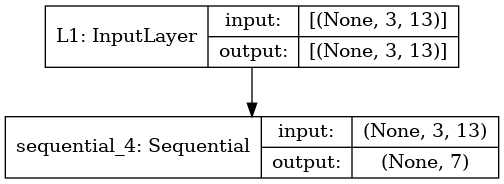

In [30]:
plot_model(generator, show_shapes=True)

In [1]:
# encoder_lstm(noise)

In [2]:
batch_size = 2048
num_epochs = 1001

steps_per_epoch = int(len(LSTM_Train)/batch_size)

for epoch in range(num_epochs):
    v=0
    L = np.random.permutation(len(LSTM_Train))
    for batch in range(steps_per_epoch):
        bs = batch_size
        data = LSTM_Train[L[v:v+bs]]
        a = autoencoder.train_on_batch(data, data)
        final_data = autoencoder.predict(data)
        real_data_x = embedder.predict(data)
        v+=bs
        bs =len(data)
        noise = np.random.normal(0, 1, (bs, seq_len, 13))
        
        if epoch % 50 == 0:
            real_loss = discriminator.train_on_batch(real_data_x, np.ones((bs,1)))
            fake_data_z = gen_sup.predict(noise)
            fake_loss = discriminator.train_on_batch(fake_data_z, np.zeros((bs,1)))
            
            discriminator_loss = 0.5 * np.add(real_loss, fake_loss)
        
        
        l = gen_sup.train_on_batch(noise, real_data_x)


        # Train the generator
        generator_loss = gan.train_on_batch(noise, np.ones((bs, 1)))
        final_loss = final.train_on_batch(noise,final_data)
        if epoch==0 or (epoch+1)%10 == 0:
            print(discriminator_loss, generator_loss)

            # Print the loss
            print('Epoch %d: Discriminator Loss=%.4f, Generator Loss=%.4f, Emb Loss=%.4f, Aut Loss=%.4f, Final Loss=%.4f' 
                  % (epoch+1, discriminator_loss[0], generator_loss[0], l, a, final_loss))
        

In [ ]:
noise = np.random.normal(0, 1, (len(LSTM_Train), seq_len,  13))

In [ ]:
P = gen_sup.predict(noise)


In [ ]:
Q=final.predict(noise)
Q = Q[:,-1]
print(Q[0])

In [ ]:
A = LSTM_Train[0]
print(A[0])

In [ ]:
original_data = scaler.inverse_transform(Q)

In [ ]:
print('Temp   Hum   Pres  Rain  Light  Ax   Ay   Az  Wx   Wy   Wz   Mos   Mov')
for i in range(13):
    print("%.2f "%(original_data[0][i]), end="")

In [ ]:
A= embedder.predict(LSTM_Train)

In [ ]:
A.shape, LSTM_Train_count.shape

In [ ]:
tSNE(A,LSTM_Train_count)

In [ ]:
L = np.zeros(int(len(P)/2))
M = np.ones(len(P)-int(len(P)/2))
L = np.hstack((L,M))
L = convert_to_one_hot(L)

In [ ]:
tSNE(P,L)

In [ ]:
B = np.vstack((A,P))
zz = np.zeros((LSTM_Train_count.shape[0],1))
zz = np.hstack((LSTM_Train_count,zz))
cc = np.ones((L.shape[0],1))
dd = np.zeros(L.shape)
cc = np.hstack((dd,cc))
ee = np.vstack((zz,cc))
tSNE(B,ee)
